In [1]:
import numpy as np
import matplotlib.pyplot as plt

from ddfUtils import *
from ddfRoot import *
from mplStyling import addMplLabel
from sndUtils import *
from scipy import odr
from scipy.special import erfc

plt.style.use("root")

runs = (7080, 10241)

Welcome to JupyROOT 6.28/12


In [2]:
L = {7080: 0.06101285350784462, 10241: 0.0654850394577328}
dL = 0.035
A = 928

In [3]:
eff = {
    7080: {
        1e12: {1: 0.869, 11: 0.920, 3: 0.844, 13: 0.883},
        80:   {1: 0.880, 11: 0.944, 3: 0.900, 13: 0.917}
    },
    10241: {
        1e12: {1: 0.833, 11: 0.855, 3: 0.830, 13: 0.854},
        80:   {1: 0.855, 11: 0.881, 3: 0.856, 13: 0.874}
    }
}


effErr = {
    7080: {
        1e12: {1: 0.010, 11: 0.017, 3: 0.028, 13: 0.028},
        80:   {1: 0.008, 11: 0.010, 3: 0.014, 13: 0.020}
    },
    10241: {
        1e12: {1: 0.011, 11: 0.015, 3: 0.026, 13: 0.019},
        80:   {1: 0.007, 11: 0.010, 3: 0.015, 13: 0.011}
    }
}

In [4]:
nTracks = {
    run: {
        ang: { "meanRes": [], "nTracks1": [], "nTracks11": [], "nTracks3": [], "nTracks13": [] } for ang in (80, 1e12)
    } for run in runs
}

In [5]:
for run in runs:
    for ang in (80, 1e12):
        for meanRes in np.arange(1, 15.76, 0.25):

            _df = pd.read_csv(f"/eos/user/i/idioniso/mfout/nTracks/var-meanRes/nTracks{run}.{meanRes:.02f}_{ang:.0e}mrad.csv")

            nTracks[run][ang]["meanRes"].append(meanRes)
            for tt in (1, 11, 3, 13):
                nTracks[run][ang][f"nTracks{tt}"].append(_df.at[0, f"nTracks{tt}"])

In [6]:
for run in runs:
    for ang in (80, 1e12):
        nTracks[run][ang] = pd.DataFrame(nTracks[run][ang])

In [7]:
for tt in (1, 11, 3, 13):
    nTracks[run][ang][tt] = nTracks[run][ang][f"nTracks{tt}"] / eff[run][ang][tt]

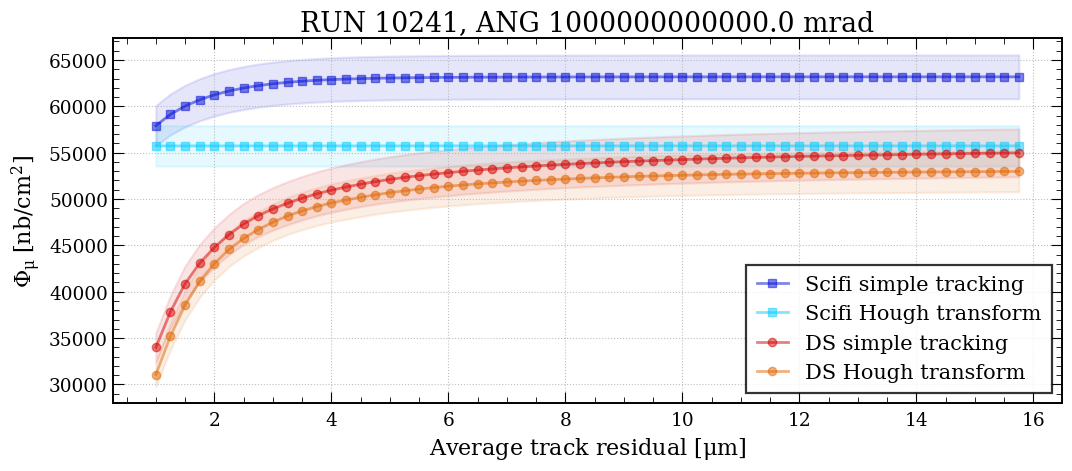

In [ ]:
RUN = 10241
ANG = 1e12

plt.figure(figsize=(11, 5))
colors = {1: "#000bd4", 11: "#009bb3", 3: "#d40000", 13: "#e06500"}
markers = {1: "s", 11: "s", 3: "o", 13: "o"}

for tt in (1, 11, 3, 13):
    x = nTracks[RUN][ANG]["meanRes"]
    y = nTracks[RUN][ANG][f"nTracks{tt}"] / (eff[RUN][ANG][tt] * 928 * L[RUN])

    ey = (
        1/(A * eff[RUN][ANG][tt] * L[RUN]) * np.sqrt(
            nTracks[RUN][ANG][f"nTracks{tt}"] +
            (nTracks[RUN][ANG][f"nTracks{tt}"] * effErr[RUN][ANG][tt] / eff[RUN][ANG][tt])**2 +
            (nTracks[RUN][ANG][f"nTracks{tt}"] * dL)**2
        )
    )

    plt.plot(x, y, lw=2, marker=markers[tt], ms=6, color=colors[tt], alpha=0.5, label=f"{system(tt)} {algorithm(tt)}")
    plt.fill_between(x, y - ey, y + ey, color=colors[tt], alpha=0.1)

plt.legend(fontsize=15)
plt.grid()
plt.xlabel("Average track residual $[\mu m]$")
plt.ylabel("$\Phi_{\mu} \; [nb/cm^{2}]$")
plt.title(f"RUN {RUN}, ANG {ANG} mrad")
plt.tight_layout()


plt.show()
